# 자연어처리
- 설치 목록
    - JDK (Java SE Downloads) 1.7이상
        - https://www.oracle.com/java/technologies/downloads/ 
    - 자바 시스템 변수 설정
        - 시스템변수 생성 -> 이름:JAVA_HOME c:\~~\jdk-18
        - 시스템변수 생성 -> 이름:CLASSPATH %JAVA_HOME%\lib
        - 시스템변수 Path 편집 -> 새로만들기 -> %JAVA_HOME%\lib\ 
        - - 참고 -> https://languagestory.tistory.com/11
    - JPype 설치
        - https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 에서 JPype 1.3.0cp37 ~ 64
        - 1) JPype1-1.1.2-cp37-cp37m-win_amd64 를 anaconda3 아래에 복붙
        - 2) cd : 아나콘다3경로
        - 3) pip install JPype1-1.1.2-cp37-cp37m-win_amd64.whl
    - KoNLPy 설치
        - 아나콘다3경로에서) python 치고
            - import nltk
            - nltk.download()
            - All Packages누르고 -> stopwords와 punkt 더블클릭해서 다운로드
    - 워드클라우드
        - pip install wordcloud
    - gensim 설치
        - pip install gensim

*환경변수에 아래 3개 추가
- C:\~\anaconda3 추가
- C:\~\anaconda3\Library 추가
- C:\~\anaconda3\Scripts 추가

### 자연어란?
자연어란 일상 생활 속에서 사용하는 언어를 말한다.

### 전처리순서
1. 토큰화: 단어분리
2. 불용어 제거: 불필요한 단어 삭제
3. 어간 추출: 단어 기본 형태 추출
4. 문서 표현: 주어진 문장을 하나의 벡터로 표현, 단어들을 모두 인덱싱

### 1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈 설치

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [2]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~') # 형태소 추출
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~') #

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [3]:
# Twitter -> Okt 로 이름이 바뀜
from konlpy.tag import Okt
t = Okt()
t.nouns('한국어 분석을 시작합니다 재미있어요~~')
t.morphs('한국어 분석을 시작합니다 재미있어요~~')
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

# 2. 워드 크라우드 설치

In [2]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [3]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said") # said는 불용어 처리

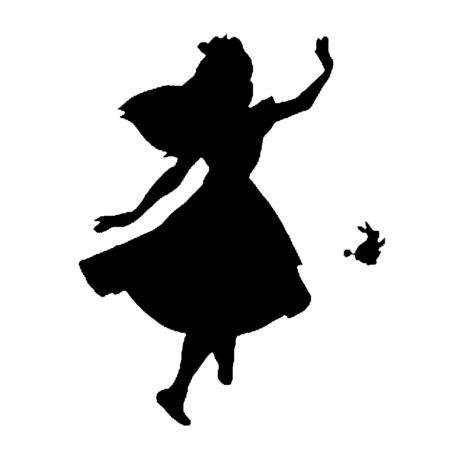

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
# 엘리스라는 문서에서 단어 뽑아옴
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

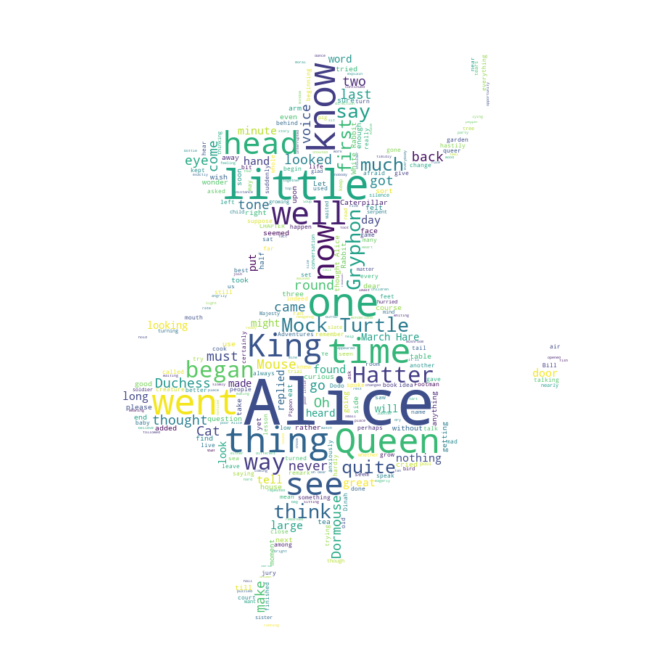

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
import numpy as np
text = open('../data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

In [7]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

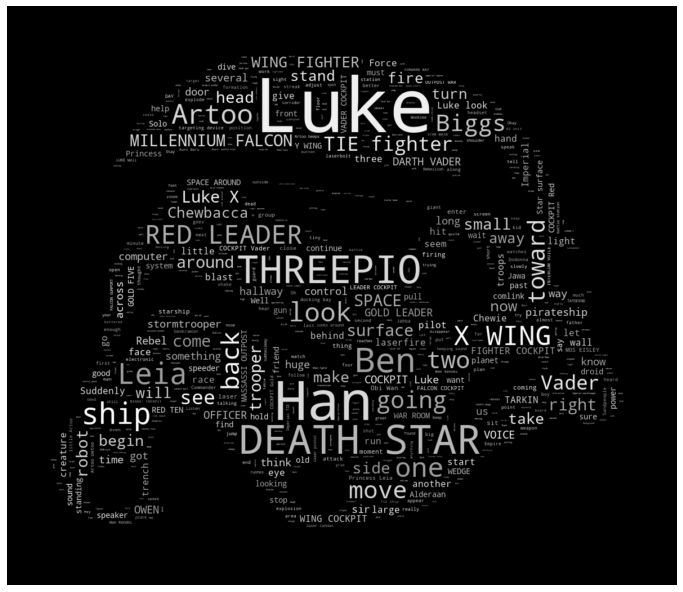

In [8]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()